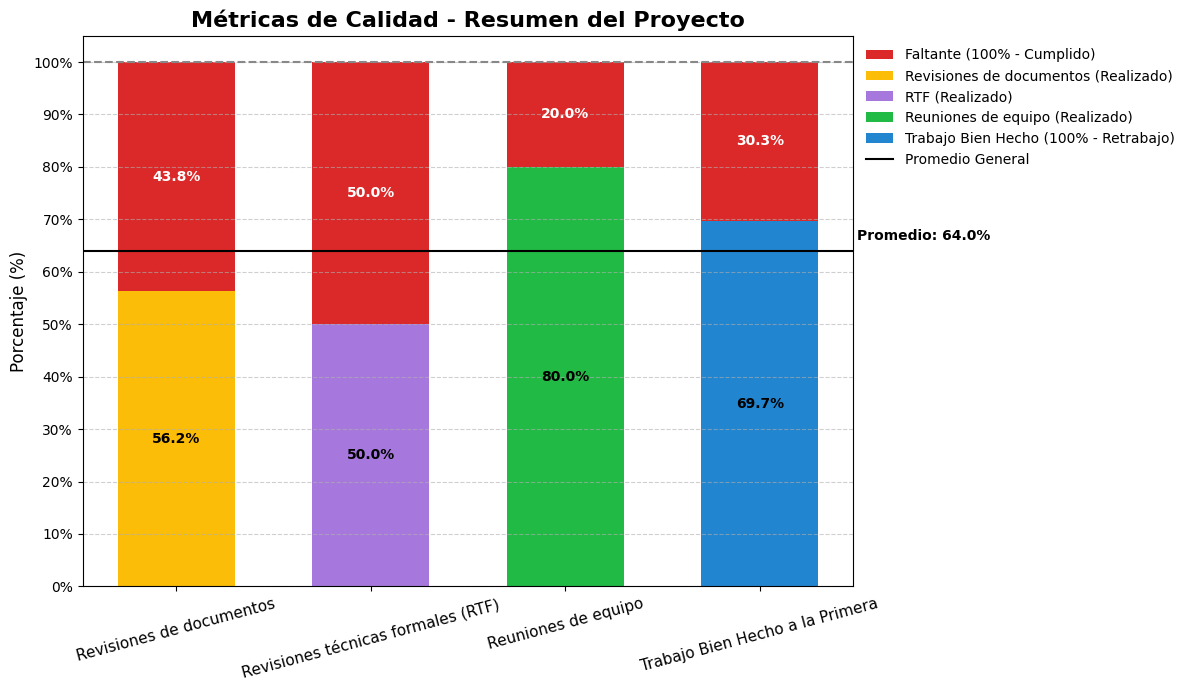

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.ticker as mtick

# ================== 1. DATOS DE ENTRADA CONSOLIDADOS ==================

# Nota: Los datos reflejan la suma de Realizadas vs Previstas de todas las 4 iteraciones.
df_ajustes = pd.DataFrame({
    'Etapa': ['Inicio I-1', 'Elaboración I-1', 'Elaboración I-2', 'Construcción I-1'],
    'Trabajo total': [8, 11, 13, 6], 'ajustes en documento': [4, 4, 3, 0.5]
})

df_reuniones = pd.DataFrame({
    'Etapa': ['Inicio I-1', 'Elaboración I-1', 'Elaboración I-2', 'Construcción I-1'],
    'Previstas': [0, 3, 5, 2], 'Realizadas': [0, 3, 4, 1]
})

df_rtf = pd.DataFrame({
    'Etapa': ['Inicio I-1', 'Elaboración I-1', 'Elaboración I-2', 'Construcción I-1'],
    'Previstas': [0, 0, 2, 2], 'Realizadas': [0, 0, 1, 1]
})

df_revisiones = pd.DataFrame({
    'Etapa': ['Inicio I-1', 'Elaboración I-1', 'Elaboración I-2', 'Construcción I-1'],
    'Previstas': [0, 5, 7, 4], 'Realizadas': [0, 3, 5, 1]
})


# ================== 2. CÁLCULO CUMULATIVO DEL PROYECTO ==================
def calculate_cumulative_percentage(df, previstas_col, realizadas_col):
    """Calcula el porcentaje (Sum(Realizadas) / Sum(Previstas)) * 100)."""
    total_realizadas = df[realizadas_col].sum()
    total_previstas = df[previstas_col].sum()

    if total_previstas == 0:
        return 0.0

    return (total_realizadas / total_previstas) * 100

# Cálculo para las métricas de CUMPLIMIENTO
rev_doc_cumplimiento = calculate_cumulative_percentage(df_revisiones, 'Previstas', 'Realizadas')
rtf_cumplimiento = calculate_cumulative_percentage(df_rtf, 'Previstas', 'Realizadas')
reuniones_cumplimiento = calculate_cumulative_percentage(df_reuniones, 'Previstas', 'Realizadas')

# Cálculo para el RATIO DE RETRABAJO (Trabajo Bien Hecho = 100% - Retrabajo)
total_ajustes = df_ajustes['ajustes en documento'].sum()
total_trabajo = df_ajustes['Trabajo total'].sum()
ratio_retrabajo = (total_ajustes / total_trabajo) * 100
trabajo_bien_hecho = 100 - ratio_retrabajo

# Array de cumplimiento (Cumplido)
cumplido = [
    rev_doc_cumplimiento,
    rtf_cumplimiento,
    reuniones_cumplimiento,
    trabajo_bien_hecho
]

# Array Faltante y Etiquetas
faltante = [100 - c for c in cumplido]
metricas = [
    'Revisiones de documentos',
    'Revisiones técnicas formales (RTF)',
    'Reuniones de equipo',
    'Trabajo Bien Hecho a la Primera',
]
etiquetas_cumplido = [f"{c:.1f}%" for c in cumplido]
colores_cumplido = ['#fbbd08', '#a678dd', '#21ba45', '#2185d0']
colores_faltante = ['#db2828'] * len(metricas)
x = np.arange(len(metricas))
width = 0.6

# Cálculo del promedio general de cumplimiento
promedio_cumplimiento = np.mean(cumplido)

# ================== 3. GRÁFICO MATPLOTLIB FINAL ==================
plt.figure(figsize=(12, 7))

# Barras apiladas con etiquetas
for i in range(len(metricas)):
    # Barra de cumplimiento
    plt.bar(x[i], cumplido[i], color=colores_cumplido[i], width=width)
    plt.text(x[i], cumplido[i]/2, etiquetas_cumplido[i], ha='center', va='center',
             fontsize=10, color='black', fontweight='bold', wrap=True)

    # Barra de faltante
    if faltante[i] > 1:
        plt.bar(x[i], faltante[i], bottom=cumplido[i], color=colores_faltante[i], width=width)
        plt.text(x[i], cumplido[i] + faltante[i]/2, f"{faltante[i]:.1f}%",
                 ha='center', va='center', fontsize=10, color='white', fontweight='bold')
    elif faltante[i] > 0:
        plt.bar(x[i], faltante[i], bottom=cumplido[i], color=colores_faltante[i], width=width)

# LÍNEA PUNTEADA DEL 100% (Planificado)
plt.axhline(100, color='#888888', linestyle='--', linewidth=1.5, label='Planificado (100%)')

# LÍNEA DE PROMEDIO DE CUMPLIMIENTO (Sólida, con etiqueta)
plt.axhline(promedio_cumplimiento, color='black', linestyle='-', linewidth=1.5, label=f'Promedio: {promedio_cumplimiento:.1f}%')
plt.text(len(metricas) - 0.5, promedio_cumplimiento + 2, f'Promedio: {promedio_cumplimiento:.1f}%',
         fontsize=10, fontweight='bold', color='black')

# Ejes y estilo
plt.xticks(x, metricas, rotation=15, ha='center', fontsize=11)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.yticks(np.arange(0, 101, 10), [f'{i}%' for i in np.arange(0, 101, 10)])
plt.title('Métricas de Calidad - Resumen del Proyecto', fontsize=16, fontweight='bold')
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Leyenda
legend_elements = [
    Patch(facecolor='#db2828', label='Faltante (100% - Cumplido)'),
    Patch(facecolor='#fbbd08', label='Revisiones de documentos (Realizado)'),
    Patch(facecolor='#a678dd', label='RTF (Realizado)'),
    Patch(facecolor='#21ba45', label='Reuniones de equipo (Realizado)'),
    Patch(facecolor='#2185d0', label='Trabajo Bien Hecho (100% - Retrabajo)'),
    plt.Line2D([0], [0], color='black', linestyle='-', linewidth=1.5, label=f'Promedio General'),
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.0, 1.0), loc='upper left', fontsize=10, frameon=False)

plt.tight_layout()
plt.show()